In [1]:
from cProfile import label

from customhys import benchmark_func as bf
from customhys import metaheuristic as mh


import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

import numpy as np
import pandas as pd

### CarromTable 
#### Domain Limits: −10 ≤ xi ≤ 10.
-  (Continuous, Differentiable, Non-Separable,
Non-Scalable, Multimodal)
-  The four global minima are located at x∗ = f (±9.646157266348881, ±9.646134286497169),f(x∗) = −24.1568155.

In [ ]:
## Metaheuristics with Dimension 2




Search operators to employ:
swarm_dynamic(factor=0.7,self_conf=2.54,swarm_conf=2.56,version='inertial',distribution='uniform') with greedy
local_random_walk(probability=0.75,scale=1.0,distribution='uniform') with greedy
--------------------------------------------------
1
pop. radius: 1.19409489338402
x_best = [1.24653294 0.0535223 ], f_best = 4.332706319128462
2
pop. radius: 1.0099208347801283
x_best = [1.24653294 0.0535223 ], f_best = 4.332706319128462
3
pop. radius: 0.9939318953937385
x_best = [1.24653294 0.0535223 ], f_best = 4.332706319128462
4
pop. radius: 0.9968151251693328
x_best = [1.24653294 0.0535223 ], f_best = 4.332706319128462
5
pop. radius: 1.0308536696025326
x_best = [1.24653294 0.0535223 ], f_best = 4.332706319128462
6
pop. radius: 1.064122504665519
x_best = [1.24653294 0.0535223 ], f_best = 4.332706319128462
7
pop. radius: 1.0774029643415142
x_best = [1.24653294 0.0535223 ], f_best = 4.332706319128462
8
pop. radius: 1.0734513494044091
x_best = [1.24653294 0.0535223 ]

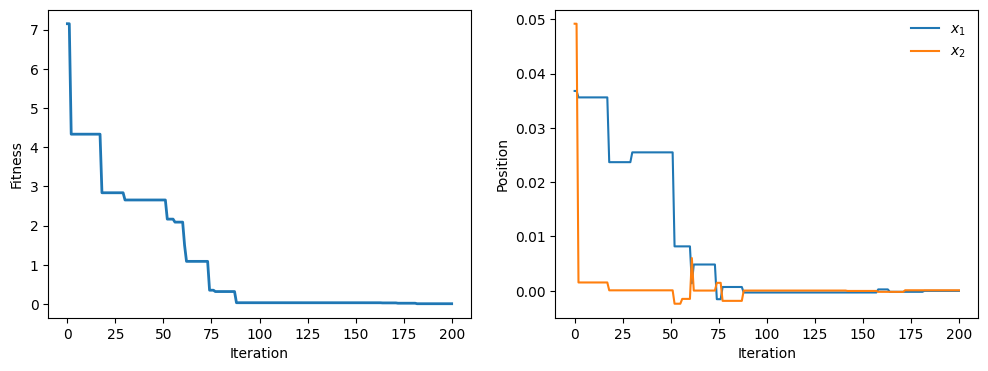

In [4]:
hist_values = met.historical

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(hist_values['fitness'], lw=2)
axs[0].set_xlabel('Iteration'), axs[0].set_ylabel('Fitness')

axs[1].plot(hist_values['position'])
axs[1].set_xlabel(r'Iteration'), axs[1].set_ylabel(r'Position')
axs[1].legend([f"$x_{ii+1}$" for ii in range(6)], frameon=False)

plt.show()

In [5]:
# Initialise the fitness register
fitness = []
# Run the metaheuristic with the same problem 30 times
for rep in range(30):
    met = mh.Metaheuristic(prob, heur, num_iterations=1000, num_agents=100)
    met.reset_historicals()
    met.verbose = False
    met.run()
    print('rep = {}, x_best = {}, f_best = {}'.format(rep+1, *met.get_solution()))
    
    fitness.append(met.historical['fitness'])

rep = 1, x_best = [ 1.45556487e-12 -1.15114747e-11], f_best = 1.1486527284887416e-09
rep = 2, x_best = [ 1.91819974e-12 -1.59222535e-12], f_best = 2.46785702984198e-10
rep = 3, x_best = [1.27759350e-12 2.69833058e-12], f_best = 2.9555025093941367e-10
rep = 4, x_best = [-9.68114392e-13 -5.77548600e-13], f_best = 1.1159784207848134e-10
rep = 5, x_best = [-8.64684491e-12 -2.70751235e-12], f_best = 8.969749387688353e-10
rep = 6, x_best = [-8.90066926e-13  1.28374233e-12], f_best = 1.546425210108282e-10
rep = 7, x_best = [ 9.61927116e-13 -6.24958922e-12], f_best = 6.259632812088967e-10
rep = 8, x_best = [-7.04518557e-12 -1.25530278e-12], f_best = 7.084217656938563e-10
rep = 9, x_best = [-2.33905783e-13  2.23308226e-12], f_best = 2.2227197860047454e-10
rep = 10, x_best = [-1.26415577e-12  2.43625982e-12], f_best = 2.717150948683411e-10
rep = 11, x_best = [7.81445542e-13 2.23268308e-12], f_best = 2.341700167107774e-10
rep = 12, x_best = [-3.09551534e-12 -4.79830441e-13], f_best = 3.1010216616

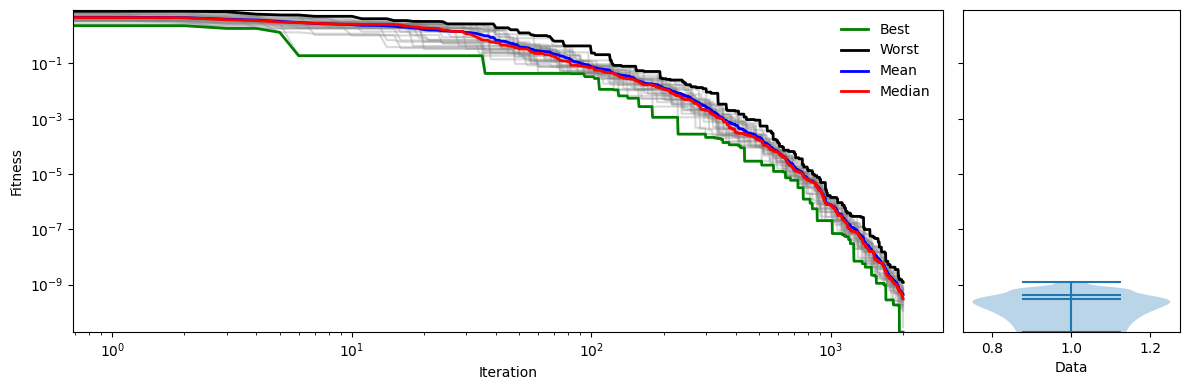

In [6]:
fitness_array = np.array(fitness).T
final_fitness = np.array([x[-1] for x in fitness_array.T])
best_fitness = np.min(fitness_array)
initial_fitness = max([x[0] for x in fitness_array])

# Now plot the fitness values
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey='row', gridspec_kw={'width_ratios': [0.8, 0.2]})
axs[0].plot(fitness_array, 'grey', alpha=0.3)

axs[0].plot(np.min(fitness_array, axis=1), 'g', lw=2, label='Best')
axs[0].plot(np.max(fitness_array, axis=1), 'k', lw=2, label='Worst')
axs[0].plot(np.mean(fitness_array, axis=1), 'b', lw=2, label='Mean')
axs[0].plot(np.median(fitness_array, axis=1), 'r', lw=2, label='Median')

axs[0].set_ylabel(r'Fitness')
axs[0].set_xlabel(r'Iteration')
axs[0].set_ylim([best_fitness, initial_fitness])

# Violin plot
axs[1].violinplot(final_fitness, showmeans=True, showmedians=True)
axs[1].set_xlabel(r'Data')

axs[0].legend(frameon=False)

axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[0].set_xscale('log')
plt.tight_layout()
plt.show()